In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import confusion_matrix as conf_mat
from sklearn.neighbors import KNeighborsClassifier as knn
%matplotlib inline

# 1.

In [2]:
df = pd.read_csv("C:\\Users\\Owner\\Desktop\\Python\\Datasets\\Yelp Data Restaurant Reviews Ratings.csv")

In [3]:
# Took reviews out of data frame
df_no_rev = df[['stars', 'votes_cool', 'votes_funny', 'votes_useful', 'Cheap',\
                'Moderate', 'Expensive', 'VeryExpensive', 'American', 'Chinese',\
                'French', 'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
                'Mexican', 'Thai', 'Vietnamese', 'Others']]

# Divide the dataframe into train and test sets
train, test = train_test_split(df_no_rev, test_size = 0.6)

# Divide train and test into X and Y
train_X = train[['votes_cool', 'votes_funny', 'votes_useful', 'Cheap', 'Moderate',\
       'Expensive', 'VeryExpensive', 'American', 'Chinese', 'French',\
       'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
       'Mexican', 'Thai', 'Vietnamese', 'Others']]
train_Y = (train['stars']>=4)
test_X = test[['votes_cool', 'votes_funny', 'votes_useful', 'Cheap', 'Moderate',\
       'Expensive', 'VeryExpensive', 'American', 'Chinese', 'French',\
       'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
       'Mexican', 'Thai', 'Vietnamese', 'Others']]
test_Y = (test['stars'] >= 4)

# Turn dataframes into matrices 
train_Xmat = train_X.as_matrix()
train_Ymat = train_Y.as_matrix()
test_Xmat = test_X.as_matrix()
test_Ymat = test_Y.as_matrix()

In [4]:
clf1 = GBC(loss='deviance', learning_rate=0.1, n_estimators=1000,\
          subsample=1.0, min_samples_split=2, min_samples_leaf=1,\
          min_weight_fraction_leaf=0.0, max_depth=4, init=None,\
          random_state=None, max_features=None, verbose=0,\
          max_leaf_nodes=None, warm_start=False, presort='auto')

In [5]:
clf1.fit(train_Xmat, train_Ymat)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [6]:
def model_prediction_summary(Y_actual,Y_predicted,\
                             Y_actual2=None,Y_predicted2=None, \
                             labels = ['Low','High'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample'):
    
    """
    Shows prediction accuracy as percent correct.
    Plots a confusion matrix.
    """
    
    
    if Y_actual2 == None and Y_predicted2 == None :
        cm = conf_mat(Y_actual,Y_predicted)
        correct = float(sum((pd.DataFrame(Y_actual)[0] == pd.Series(Y_predicted))*1))
        total = float(len(pd.DataFrame(Y_actual)))
        correct_rate = correct/total
        
        print int(correct), "correct predictions, out of", int(total)
        print "Correct ratio: ",round(correct_rate*100,2),"%"
        labels = ['1','2','3','4','5']
        plt.figure()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title(title)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    elif Y_actual2 != None and Y_predicted2 != None:

        fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
        cm1 = conf_mat(Y_actual,Y_predicted)
        cm2 = conf_mat(Y_actual2,Y_predicted2)
        
        fig = plt.figure(1)
        fig.set_size_inches(8*1.5,6*1.5)
        
        cax1 = ax1.matshow(cm1)
        ax1.set_title(title, y=1.2)
        fig.colorbar(cax1, ax = ax1)
        ax1.set_xticklabels([''] + labels)
        ax1.set_yticklabels([''] + labels)
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('True')

        cax2 = ax2.matshow(cm2)
        ax2.set_title(title2, y=1.2)
        fig.colorbar(cax2, ax = ax2)
        ax2.set_xticklabels([''] + labels)
        ax2.set_yticklabels([''] + labels)
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('True')
        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None,\
                            wspace=None,hspace=None)
        
        fig.tight_layout()
        
        plt.show()
        
        correct = float(sum((pd.DataFrame(Y_actual)[0] == pd.Series(Y_predicted))*1))
        total = float(len(pd.DataFrame(Y_actual)))
        correct_rate = correct/total
        print
        print
        print "In sample predictions:"
        print int(correct), "correct predictions, out of", int(total)
        print "Accuracy: ",round(correct_rate*100,2),"%"
        print
        print
        correct2 = float(sum((pd.DataFrame(Y_actual2)[0] == pd.Series(Y_predicted2))*1))
        total2 = float(len(pd.DataFrame(Y_actual2)))
        correct_rate2 = correct2/total2
        
        print "Out of sample predictions:"
        print int(correct2), "correct predictions, out of", int(total2)
        print "Accuracy: ",round(correct_rate2*100,2),"%"
    else:
        raise ValueError('You done screwed the pooch')

In [7]:
j = clf1.predict(train_Xmat)
k = clf1.predict(test_Xmat)

## Gradient Boosting Classifier Model

C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


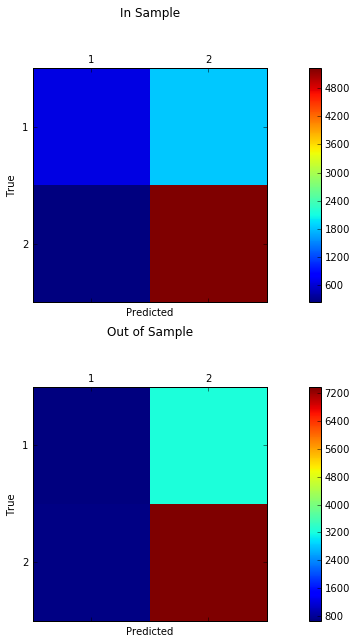



In sample predictions:
5899 correct predictions, out of 7999
Accuracy:  73.75 %


Out of sample predictions:
8055 correct predictions, out of 12000
Accuracy:  67.13 %


In [8]:
model_prediction_summary(train_Ymat,j,\
                             test_Ymat,k, \
                             labels = ['1','2','3','4','5'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample')

## KNN

In [9]:
kn = knn()

In [10]:
kn.fit(train_Xmat, train_Ymat)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
L = kn.predict(train_Xmat)
m = kn.predict(test_Xmat)

C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


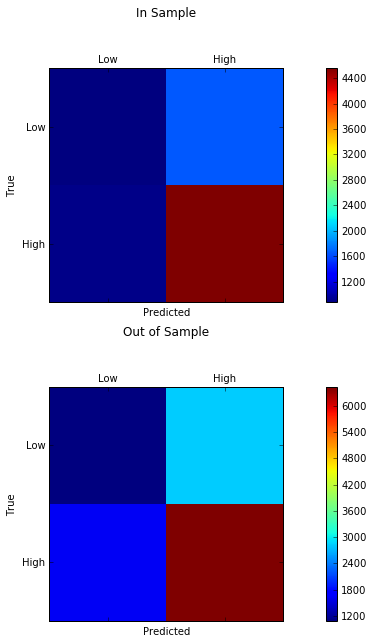



In sample predictions:
5435 correct predictions, out of 7999
Accuracy:  67.95 %


Out of sample predictions:
7530 correct predictions, out of 12000
Accuracy:  62.75 %


In [12]:
model_prediction_summary(train_Ymat,L,\
                             test_Ymat,m, \
                             labels = ['Low','High'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample')

## Gradient Boost, factoring in KNN results

In [13]:
train_X_wKNN = train_X
train_X_wKNN = train_X_wKNN.reset_index()
train_X_wKNN["KNN Pred"] = pd.Series(L)

test_X_wKNN = test_X
test_X_wKNN = test_X_wKNN.reset_index()
test_X_wKNN["KNN Pred"] = pd.Series(m)

# Turn dataframes into matrices 
train_Xmat_wKNN = train_X_wKNN.as_matrix()
train_Ymat = train_Y.as_matrix()
test_Xmat_wKNN = test_X_wKNN.as_matrix()
test_Ymat = test_Y.as_matrix()

In [14]:
print train_X_wKNN


      index  votes_cool  votes_funny  votes_useful  Cheap  Moderate  \
0      6163           0            0             0      1         0   
1     17360           4            1             1      0         0   
2      5943           0            0             0      0         1   
3     19430           1            0             1      0         1   
4     10222           1            0             2      0         1   
5     19097           0            1             2      0         0   
6      6524           0            0             1      0         1   
7     13266           0            0             0      0         1   
8      9476           0            0             0      0         1   
9     15654           2            0             1      0         1   
10    10651           0            0             0      0         1   
11    15261           1            0             2      0         1   
12    14694           2            3             3      1         0   
13    

In [15]:
clf2 = GBC(loss='deviance', learning_rate=0.1, n_estimators=1000,\
          subsample=1.0, min_samples_split=2, min_samples_leaf=1,\
          min_weight_fraction_leaf=0.0, max_depth=4, init=None,\
          random_state=None, max_features=None, verbose=0,\
          max_leaf_nodes=None, warm_start=False, presort='auto')

In [16]:
clf2.fit(train_Xmat_wKNN, train_Ymat)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [17]:
n = clf2.predict(train_Xmat_wKNN)
o = clf2.predict(test_Xmat_wKNN)

C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\Owner\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


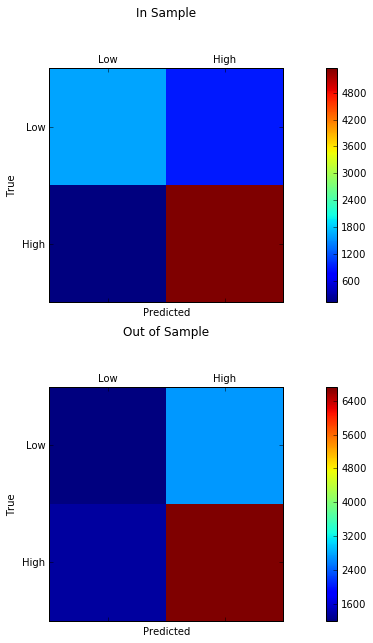



In sample predictions:
6974 correct predictions, out of 7999
Accuracy:  87.19 %


Out of sample predictions:
7931 correct predictions, out of 12000
Accuracy:  66.09 %


In [18]:
model_prediction_summary(train_Ymat,n,\
                             test_Ymat,o, \
                             labels = ['Low','High'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample')

# ESTEBAN's CODE

# A

In [19]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

import seaborn

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
yelp = pd.read_csv("C:\\Users\\Owner\\Desktop\\Python\\Datasets\\Yelp Data Restaurant Reviews Ratings.csv")


In [21]:
# Convert rating to high (4,5) or low (1,2,3)
yelp['rating'] = np.where(yelp['stars'] >= 4, 'high','low')
yelp.head(1)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low


In [22]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(yelp, test_size=0.25, random_state=123)

In [23]:
x_train = train.drop(['stars', 'Review', 'rating'], axis=1)
y_train = train['rating']

x_test = test.drop(['stars', 'Review', 'rating'], axis=1)
y_test = test['rating']

# LOG REG

In [24]:
import sklearn
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)

print 'Logistic Regression Accuracy:', logreg_testAccuracy

Logistic Regression Accuracy: 0.6844


# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,101)
accuracies = []
for k in k_range:
    if k % 10 == 0:
        print 'Performing classifier', k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_classifier = knn.fit(x_train, y_train)
    knn_accuracy = knn.score(x_test, y_test)
    accuracies.append(knn_accuracy)

Performing classifier 10
Performing classifier 20
Performing classifier 30
Performing classifier 40
Performing classifier 50
Performing classifier 60
Performing classifier 70
Performing classifier 80
Performing classifier 90
Performing classifier 100


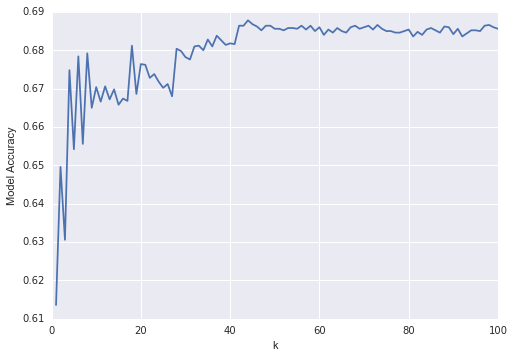

In [26]:
plot(k_range, accuracies)
xlabel('k')
ylabel('Model Accuracy')

In [27]:
s_accuracies = Series(accuracies)

k = s_accuracies.idxmax() + 1
knn = KNeighborsClassifier(n_neighbors=k)
knn_classifier = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_accuracy = knn.score(x_test, y_test)

print 'KNN (k = %i) Accuracy: %.4f' % (k, knn_accuracy)

KNN (k = 44) Accuracy: 0.6878


# NAive Bayes

In [28]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb_classifier = bnb.fit(x_train, y_train)
bnb_predict = bnb.predict(x_test)
bnb_accuracy = bnb.score(x_test, y_test)

print 'Bernoulli Naive Bays Accuracy:', bnb_accuracy

Bernoulli Naive Bays Accuracy: 0.6816


In [29]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb_classifier = mnb.fit(x_train, y_train)
mnb_predict = mnb.predict(x_test)
mnb_accuracy = mnb.score(x_test, y_test)

print 'Multinomial Naive Bayes Accuracy:', mnb_accuracy

Multinomial Naive Bayes Accuracy: 0.6812


# B

# C

# D

In [30]:
ss = pd.read_csv("C:\\Users\\Owner\\Desktop\\Python\\Datasets\\YelpNoHeader.csv", header = None)
ss.head(1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,CLOSED This JB s locati...,2,-2


In [31]:
ss['rating'] = np.where(ss[0] >= 4, 'high','low')

In [32]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(ss, test_size=0.25, random_state=123)

x_train = train[21].reshape(-1,1)
y_train = train['rating'].reshape(-1,1)

x_test = test[21].reshape(-1,1)
y_test = test['rating'].reshape(-1,1)

In [33]:
import sklearn
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)

print 'Logistic Regression Accuracy:', logreg_testAccuracy

Logistic Regression Accuracy: 0.7002


C:\Users\Owner\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# E

In [34]:
yelp.head(1)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low


In [35]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

yelpsub = yelp.sample(500)

# Tokenize all job descriptions from sample
yelpsub['tokenized_strip'] = yelpsub.apply(lambda row: row['Review'].decode('utf-8').strip(),axis=1)
yelpsub['tokenized'] = yelpsub.apply(lambda row: nltk.word_tokenize(row['tokenized_strip']),axis=1)

In [36]:
reviews = []
for index, value in yelpsub.iterrows():
    reviews.append(value['tokenized'])

In [37]:
reviews_lower = []
for review in reviews:
    review_lower = []
    for token in review:
        token_lower = token.lower()
        review_lower.append(token_lower)
    reviews_lower.append(review_lower)

In [38]:

reviews = reviews_lower

all_count = 0
for review in reviews:
    for token in review:
        all_count += 1

all_count

75728

In [39]:
single_dict = {}
for review in reviews:
    for token in review:
        if token in single_dict:
            single_dict[token] += 1
        else:
            single_dict[token] = 1

In [40]:
bigrams = []
for review in reviews:
    small_list = []
    for i in range(len(review[0:-1])):
        small_list.append((review[i], review[i+1]))
    bigrams.append(small_list)

bigram_dict = {}
for review in bigrams:
    for tup in review:
        tup_space = ' '.join(tup)
        if tup_space in bigram_dict:
            bigram_dict[tup_space] += 1
        else:
            bigram_dict[tup_space] = 1

In [41]:
bigram_count = 0
for review in bigrams:
    for bigram in review:
        bigram_count += 1
        
bigram_count

75228

In [42]:
import math

zipped = []
for bigram in bigram_dict: 
    bigram_sep = bigram.split()
    p_bi = bigram_dict[bigram] / (bigram_count * 1.0)
    p_word1 = single_dict[bigram_sep[0]] / (all_count * 1.0)
    p_word2 = single_dict[bigram_sep[1]] / (all_count * 1.0)
    pmi = math.log(p_bi / (p_word1 * p_word2) * 1.0)
    
    zipped.append((bigram, bigram_dict[bigram], bigram_sep[0], single_dict[bigram_sep[0]], bigram_sep[1], single_dict[bigram_sep[1]], pmi))

In [43]:
zipped_sorted = sorted(zipped, key=lambda x: x[6])
zipped_sorted.reverse()
for a,b,c,d,e,f,g in zipped_sorted:
    print a, g

arpaio-inspired silent 11.2415277232
enthusiastically answered 11.2415277232
beingblood sweat 11.2415277232
del mar 11.2415277232
chuck e 11.2415277232
machines-the dispenser 11.2415277232
animal flesh 11.2415277232
mcshivers cuz 11.2415277232
medicines bangles 11.2415277232
anxiously awaited 11.2415277232
paula abdul 11.2415277232
apricots nuts 11.2415277232
miller lite 11.2415277232
rand h. 11.2415277232
cote du 11.2415277232
carlsbad tavern 11.2415277232
fortune cookie 11.2415277232
darling busser/helper/whatever 11.2415277232
triple-digit temperatures 11.2415277232
officers firemen 11.2415277232
pretzel crisps 11.2415277232
favorite- tastykakes 11.2415277232
buca peter 11.2415277232
aunt/uncles house.wide 11.2415277232
sour/dirty sponge 11.2415277232
feb 2012 11.2415277232
governors rabble 11.2415277232
inappropriate joke 11.2415277232
eyeliner glory 11.2415277232
guitar player 11.2415277232
shan chickencrab 11.2415277232
politely disagree 11.2415277232
estonia square 11.2415277232

# Part F

In [71]:
pattern = r'\s?(\w+)\s?'
pos=[]
unigram=[]
high_rated= yelpsub[yelpsub['rating']=='high'] ## reviews with high rating
low_rated= yelpsub[yelpsub['rating']=='low'] ## reviews with low rating

# Part F

### Approach: 
In order to find the most important attributes for high and low ratings respectively we first tokenized all the words from every review, removed stopwords, tagged them with the parts of speech, then filtered by proper nouns (to get the attributes). After that we simply found the most common words for high and low ratings.

In [112]:
from nltk.corpus import stopwords as stpwds
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stopwords = stpwds.words("english")

## high rated reviews
makes list of tokenized words for each review, takes out stopwords

In [115]:
high_reviews_df = yelpsub['Review'][yelpsub['rating'] == 'high']
high_reviews_list = [review for review in high_reviews_df]
high_review_token = [tokenizer.tokenize(high_reviews_list[i].decode('utf-8')) for i in range(len(high_reviews_list))]

high_reviews_no_stop = []

for review in high_review_token:
    review_store = []
    for word in review:
        if word not in stopwords:
            review_store.append(word)
        else:
            continue
    high_reviews_no_stop.append(review_store)

## low rated reviews
makes list of tokenized words for each review, takes out stopwords

In [137]:
low_reviews_df = yelpsub['Review'][yelpsub['rating'] == 'low']
low_reviews_list = [review for review in low_reviews_df]
low_review_token = [tokenizer.tokenize(low_reviews_list[i].decode('utf-8')) for i in range(len(low_reviews_list))]

low_reviews_no_stop = []
for review in low_review_token:
    review_store = []
    for word in review:
        if word not in stopwords:
            review_store.append(word)
        else:
            continue
    low_reviews_no_stop.append(review_store)

Now find most common words for high rated and low rated from the count dicts

In [167]:
low_review_unigram = low_review_token
POS_low=[]
for i in low_review_unigram:
    POS_low.append(nltk.pos_tag(i)) ## getting pos for each word
    merged = list(itertools.chain(*POS_low))
    low_attributes = [item[0] for item in merged if item[1] == 'NN'] ## filtering for nouns i.e. POS="NN"

In [168]:
high_review_unigram = high_review_token
POS_high=[]
for i in high_review_unigram:
    POS_high.append(nltk.pos_tag(i)) ## getting pos for each word
    merged = list(itertools.chain(*POS_high))
    high_attributes = [item[0] for item in merged if item[1] == 'NN'] ## filtering for nouns i.e. POS="NN"

In [169]:
low_reviews_word_count = dict(Counter(low_attributes))
high_reviews_word_count = dict(Counter(high_attributes))

In [170]:
import operator
sorted_high = sorted(high_reviews_word_count.items(), key=operator.itemgetter(1), reverse=True)
sorted_low = sorted(low_reviews_word_count.items(), key=operator.itemgetter(1), reverse=True)

In [175]:
print sorted_high[:5]
print sorted_low[:5]

[(u'food', 262), (u'place', 209), (u'service', 116), (u'time', 105), (u's', 97)]
[(u'food', 156), (u'place', 131), (u'time', 71), (u'menu', 63), (u'restaurant', 56)]
